In [1]:
import pandas as pd

In [2]:
california_data = pd.read_csv("housing.csv")
california_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
california_data.shape

(20640, 10)

In [4]:
california_data.info()
# total_bedrooms has some missing values
# All columns are numerical expect, ocean_proximity, which is categorical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
california_data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
california_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
# Plotting all numerical columns to get a feel of data
%matplotlib inline
import matplotlib.pyplot as plt

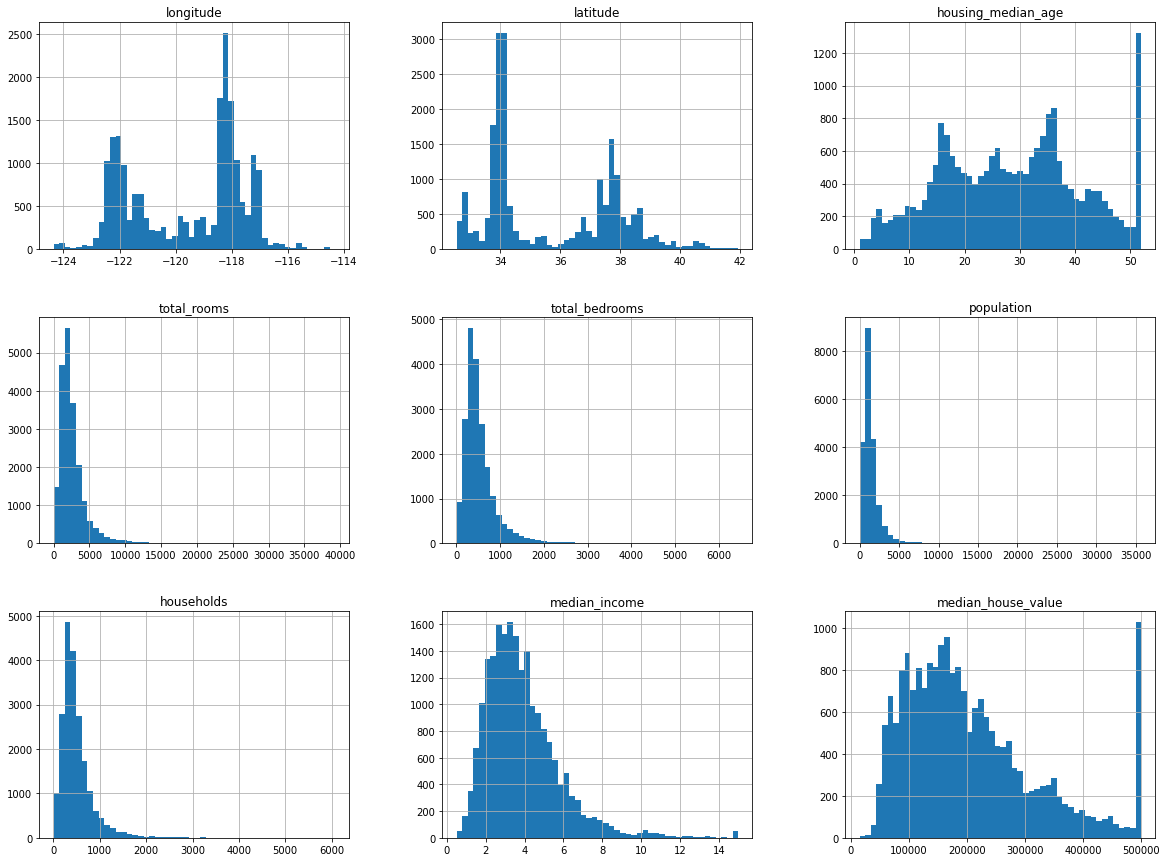

In [8]:
california_data.hist(bins=50, figsize=(20,15))
plt.show()

### Notice a few things in these histograms:
1. First, the median income attribute does not look like it is expressed in US dollars
(USD). After checking with the team that collected the data, you are told that the
data has been scaled and capped at 15 (actually 15.0001) for higher median
incomes, and at 0.5 (actually 0.4999) for lower median incomes. The numbers
represent roughly tens of thousands of dollars (e.g., 3 actually means about
30,000 dollars). Working with preprocessed attributes is common in Machine Learning,
and it is not necessarily a problem, but you should try to understand how the
data was computed.
2. The housing median age and the median house value were also capped. Capped means Bounded. The lat‐
ter may be a serious problem since it is your target attribute (your labels). Your
Machine Learning algorithms may learn that prices never go beyond that limit.
You need to check with your client team (the team that will use your system’s out‐
put) to see if this is a problem or not. If they tell you that they need precise pre‐
dictions even beyond 500,000 dollars, then you have mainly two options:
a. Collect proper labels for the districts whose labels were capped.
b. Remove those districts from the training set (and also from the test set, since
your system should not be evaluated poorly if it predicts values beyond
500,000 dollars).
3. These attributes have very different scales. We will discuss this later in this chap‐
ter when we explore feature scaling.
4. Finally, many histograms are tail heavy: they extend much farther to the right of
the median than to the left. This may make it a bit harder for some Machine
Learning algorithms to detect patterns. We will try transforming these attributes
later on to have more bell-shaped distributions.


## Create a Test Set
It may sound strange to voluntarily set aside part of the data at this stage. After all,
you have only taken a quick glance at the data, and surely you should learn a whole
lot more about it before you decide what algorithms to use, right? This is true, but
your brain is an amazing pattern detection system, which means that it is highly
prone to overfitting: if you look at the test set, you may stumble upon some seemingly
interesting pattern in the test data that leads you to select a particular kind of
Machine Learning model. When you estimate the generalization error using the test
set, your estimate will be too optimistic and you will launch a system that will not
perform as well as expected. This is called _**data snooping**_ bias.


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
train_set, test_set = train_test_split(california_data, test_size=0.2, random_state=42)

> We want our test set to be representative of the total population otherwise we'll encounter _SAMPLING BIAS_. We're using random sampling is train_test_split which works well for large datasets.

> Since, our dataset is not so big we've to do something else.

> After talking with experts, we got to know that the Median Income is a very important feature for prediction of Median House Prices. So, our test set should be representative of this feature.

> We'll create some strata for Median Income, based on that, the same ratio of samples from each strata will go in the test set.

In [11]:
# creating income category strata
california_data['income_cat'] = pd.cut(x=california_data['median_income'], 
                                       bins=[0, 1.5, 3.0, 4.5, 6.0, np.inf], 
                                       labels=[1,2,3,4,5])

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Plot showing Income Categories of various Districts')

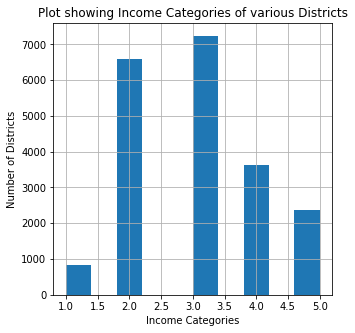

In [12]:
california_data['income_cat'].hist(figsize=(5,5))
plt.xlabel('Income Categories')
plt.ylabel('Number of Districts')
plt.title('Plot showing Income Categories of various Districts')

In [13]:
# Now we're ready to do Stratified Sampling
from sklearn.model_selection import StratifiedShuffleSplit

In [14]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [15]:
for train_index, test_index in split.split(X=california_data, y=california_data['income_cat']):
    strat_train_set = california_data.loc[train_index]
    strat_test_set = california_data.loc[test_index]
    
# Stratification is done based on y

In [16]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [17]:
california_data['income_cat'].value_counts() / len(california_data)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [18]:
strat_train_set['income_cat'].value_counts() / len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64

In [19]:
# As we can see both the test & train set are representative of the Median Income Stratas

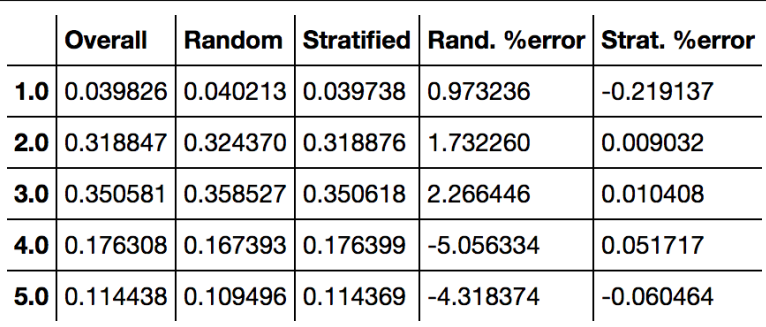

In [20]:
# Removing the income category
for set_ in (strat_train_set ,strat_test_set):
    set_.drop(labels=['income_cat'], axis=1, inplace=True)

## Discover and Visualize the Data to Gain Insights


In [21]:
california_train_set = strat_train_set.copy()

C:\Users\pc\AppData\Roaming\Python\Python38\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0.5, 1.0, 'Visaulizing Geographical Data')

<Figure size 504x504 with 0 Axes>

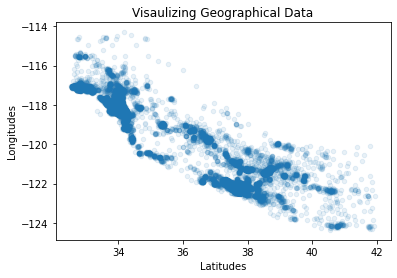

In [22]:
#### Visualizing Geographical Data
plt.figure(figsize=(7,7))
california_train_set.plot(kind='scatter', x='latitude', y='longitude', alpha=0.1)
# alpha highlights the areas based on density of points
plt.xlabel('Latitudes')
plt.ylabel('Longitudes')
plt.title('Visaulizing Geographical Data')

Now that’s much better: you can clearly see the high-density areas, namely the Bay
Area and around Los Angeles and San Diego, plus a long line of fairly high density in
the Central Valley, in particular around Sacramento and Fresno.

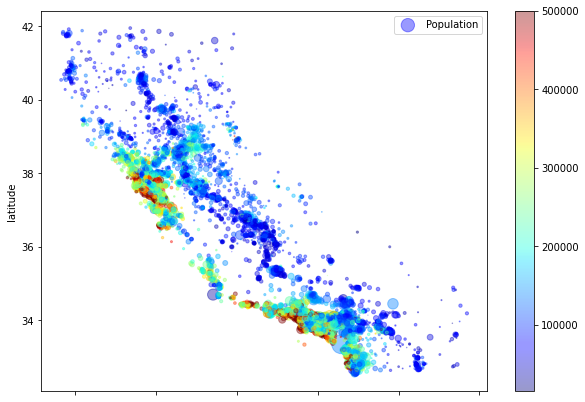

In [23]:
# plt.figure(figsize=(10, 10)) # Not working
california_train_set.plot(kind='scatter', x='longitude', y='latitude', cmap=plt.get_cmap('jet'),
                          alpha=0.4, s=california_train_set['population']/100, 
                          c=california_train_set['median_house_value'], label='Population', 
                          figsize=(10,7), colorbar=True)
plt.xlabel('longitude')
plt.legend()

In [24]:
## Finding Correlations
corr_matrix = california_train_set.corr()

In [25]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

In [26]:
# Using Pandas scatter_matrix to plot scatter plots
# Using only some promising features otherwise we'll get 121 plots (11x 11 plots)
from pandas.plotting import scatter_matrix

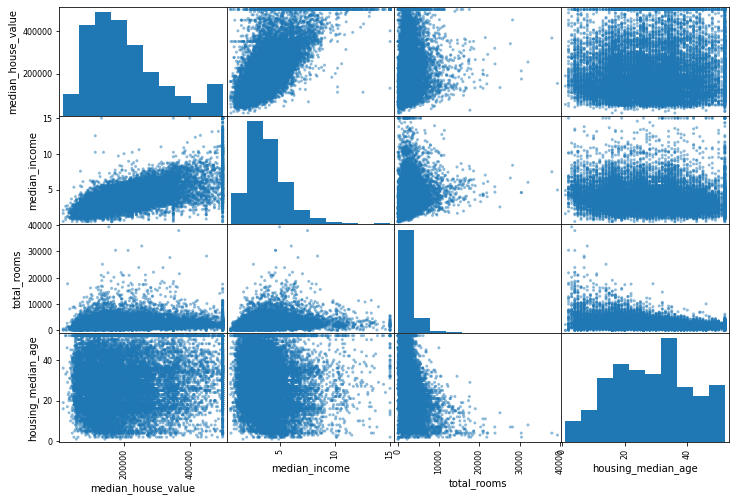

In [27]:
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(frame=california_train_set[attributes], figsize=(12,8))
plt.show()

C:\Users\pc\AppData\Roaming\Python\Python38\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='median_income', ylabel='median_house_value'>

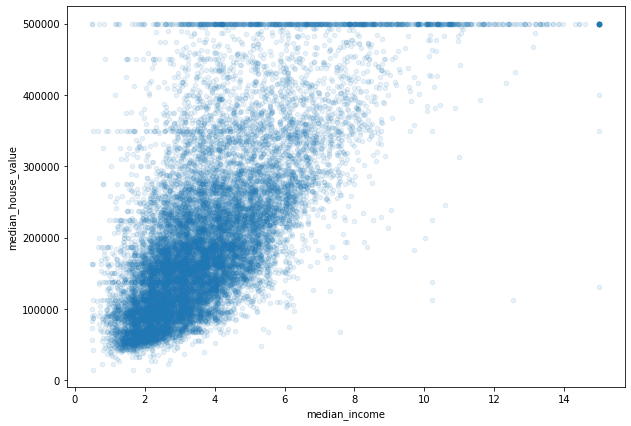

In [28]:
# Most Promising Feature to predict to Median_house_price is Median_Income
# Expanding their scatter plot
california_train_set.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1, 
                          cmap=plt.get_cmap('jet'), figsize=(10,7))

## Experimenting with Attribute Combinations

One last thing you may want to do before actually preparing the data for Machine
Learning algorithms is to try out various attribute combinations. For example, the
total number of rooms in a district is not very useful if you don’t know how many
households there are. What you really want is the number of rooms per household.
Similarly, the total number of bedrooms by itself is not very useful: you probably
want to compare it to the number of rooms. And the population per household also
seems like an interesting attribute combination to look at. Let’s create these new
attributes:

In [29]:
california_train_set['rooms_per_household'] = california_train_set['total_rooms'] / california_train_set['households']
california_train_set['bedrooms_per_room'] = california_train_set['total_bedrooms'] / california_train_set['total_rooms']
california_train_set['population_per_household'] = california_train_set['population'] / california_train_set['households']

In [30]:
corr_matrix = california_train_set.corr()

In [31]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

## Prepare the Data for Machine Learning Algorithms


In [32]:
# Cleaning the training set
california_train_set = strat_train_set.drop(labels=['median_house_value'], axis=1)
california_train_set_labels = strat_train_set['median_house_value'].copy()

In [33]:
# Imputing Missing Values for total_bedrooms
from sklearn.impute import SimpleImputer

In [34]:
imputer = SimpleImputer(strategy='median')

In [35]:
# Since the median can only be computed on numerical attributes, we need to create a
# copy of the data without the text attribute ocean_proximity

In [36]:
california_train_set_copy = california_train_set.drop(labels=['ocean_proximity'], axis=1)

In [37]:
imputer.fit(california_train_set_copy)

SimpleImputer(strategy='median')

In [38]:
imputer.statistics_   # Median Values for all the features

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [39]:
california_train_set_copy.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [40]:
X = imputer.transform(california_train_set_copy)

In [41]:
# X is a NumPy Array
california_train_set_copy_imputation = pd.DataFrame(X, columns=california_train_set_copy.columns)

In [42]:
california_train_set_copy_imputation.isnull().sum()   # No Missing Values

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

## Handling Text and Categorical Attributes
> Converting the text of Ocean_proximity into numbers so that it can be used by the ML Algo.

In [43]:
from sklearn.preprocessing import OneHotEncoder

We're not using OrdinalEncoder bcoz it will encode ordered numbers for the categories. Like 0,1,2,3,4.

In [44]:
california_train_set['ocean_proximity'].value_counts()

<1H OCEAN     7277
INLAND        5262
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: ocean_proximity, dtype: int64

    - <1H OCEAN: 0
    - INLAND: 1
    - NEAR OCEAN: 2
    - NEAR BAY: 3
    - ISLAND: 4
    
   > Although, 0 & 4 are very close to each other but still ML Algo will consider them far and will think that 0 & 1 are good bcoz they're closely related. All this happens bcoz this data is nominal not ordinal

In [45]:
oneHotEnc = OneHotEncoder()

In [46]:
california_ocean = california_train_set[['ocean_proximity']]

In [47]:
california_ocean_1hot = oneHotEnc.fit_transform(california_ocean)

In [48]:
california_ocean_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [49]:
california_ocean_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

### Custom Transformers
Although Scikit-Learn provides many useful transformers, you will need to write
your own for tasks such as custom cleanup operations or combining specific
attributes. You will want your transformer to work seamlessly with Scikit-Learn func‐
tionalities (such as pipelines), and since Scikit-Learn relies on duck typing (not inher‐
itance), all you need is to create a class and implement three methods: fit()
(returning self), transform(), and fit_transform().

In [50]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

## Feature Scaling
- The other most important thing that we're going to do is _feature scaling_. ML Algos (except some) requires the similar scales for all the features for better performance. 
- There are two ways for this: i) Normalization  ii) Standardization
- Normalization: MinMaxScaler(): Brings the range 0 to 1
- Standardization: StandardScalar(): Has not any specific range.

## Transformation Pipelines
As you can see, there are many data transformation steps that need to be executed in
the right order. Fortunately, Scikit-Learn provides the Pipeline class to help with
such sequences of transformations.

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [52]:
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')), ('attribs_addr', CombinedAttributesAdder()), 
                         ('standarization', StandardScaler())])

In [53]:
from sklearn import set_config
set_config(display='diagram')
num_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('attribs_addr', CombinedAttributesAdder()),
                ('standarization', StandardScaler())])

In [54]:
california_train_set_copy_pipe = num_pipeline.fit_transform(california_train_set_copy)

<IPython.core.display.Javascript object>

In [55]:
california_train_set_copy_pipe

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

**So far, we've handled only the numerical features of the dataset. What if we want to simultaneously handle the categorical ones also?**
- Here comes, the _ColumnTransformer_

In [56]:
from sklearn.compose import ColumnTransformer
num_attrbs = list(california_train_set_copy)
cat_attrbs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([('num', num_pipeline, num_attrbs), ('cat', OneHotEncoder(), cat_attrbs)])

california_train_set_full_pipe = full_pipeline.fit_transform(california_train_set)

<IPython.core.display.Javascript object>

In [57]:
full_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('attribs_addr',
                                                  CombinedAttributesAdder()),
                                                 ('standarization',
                                                  StandardScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income']),
                                ('cat', OneHotEncoder(), ['ocean_proximity'])])

In [58]:
california_train_set_full_pipe_df = pd.DataFrame(california_train_set_full_pipe)
california_train_set_full_pipe_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647,0.017395,0.006223,-0.121122,0.0,1.0,0.0,0.0,0.0
1,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168,0.569256,-0.040811,-0.810867,0.0,0.0,0.0,0.0,1.0
2,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434,-0.018024,-0.075371,-0.338273,0.0,1.0,0.0,0.0,0.0
3,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929,-0.595140,-0.106803,0.961205,0.0,0.0,0.0,0.0,1.0
4,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752,0.251241,0.006109,-0.474513,1.0,0.0,0.0,0.0,0.0


## Select & Train the Model
#### Training and Evaluating on the Training Set

In [59]:
# Training Linear Model
from sklearn.linear_model import LinearRegression

In [60]:
lin_reg = LinearRegression()

In [61]:
lin_reg.fit(california_train_set_full_pipe_df, california_train_set_labels)

LinearRegression()

In [62]:
# Doing Predictions on some instances from the training set
some_data = california_train_set.iloc[:5]
some_labels = california_train_set_labels.iloc[:5]

some_data_prepared = full_pipeline.transform(some_data)
predict_some_data = lin_reg.predict(some_data_prepared)

<IPython.core.display.Javascript object>

In [63]:
some_labels

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
Name: median_house_value, dtype: float64

In [64]:
predict_some_data

array([ 85657.90192014, 305492.60737488, 152056.46122456, 186095.70946094,
       244550.67966089])

In [65]:
# Computing Performance
from sklearn.metrics import mean_squared_error

In [66]:
mse = mean_squared_error(some_labels, predict_some_data)
mse  # Bull-Shit Performance!

2223992396.4044037

In [67]:
# Very high MSE on training set means Model is Underfitting the data

Underfitting means the current features don't give enough info to make good predictions
Underfitting can be reduced by:
- Using a more complex Model
- Feeding more features that may help in better predictions
- Reducing Constraints on the model
> Since, the model is not regularized and we don't have more features, then use a more complex model

In [68]:
from sklearn.tree import DecisionTreeRegressor

In [69]:
tree_reg = DecisionTreeRegressor()

In [70]:
tree_reg.fit(california_train_set_full_pipe_df, california_train_set_labels)

DecisionTreeRegressor()

In [71]:
predict_tree = tree_reg.predict(california_train_set_full_pipe_df)

In [72]:
mse_tree = mean_squared_error(california_train_set_labels, predict_tree)
mse_tree

0.0

In [73]:
# Zero Error! Maybe Model has badly overfit the data

## Better Evaluation Using Cross-Validation

In [74]:
from sklearn.model_selection import cross_val_score

In [75]:
scores = cross_val_score(tree_reg, california_train_set_full_pipe_df, california_train_set_labels, 
                         scoring='neg_mean_squared_error', cv=10)

In [76]:
scores

array([-5.14828325e+09, -5.00140243e+09, -4.72738103e+09, -5.25238702e+09,
       -4.74528612e+09, -6.01501136e+09, -5.11962269e+09, -5.24143550e+09,
       -4.89597023e+09, -5.02475250e+09])

In [77]:
tree_rmse_scores = np.sqrt(-scores)

<IPython.core.display.Javascript object>

In [78]:
def display_scores(scores):
    print('Scores: ', scores)
    print('Mean: ', np.mean(scores))
    print('Std Deviation: ', np.std(scores))

In [79]:
display_scores(tree_rmse_scores)  # Now, the same DecisionTreeRegressor has an Mean RMSE of about 71K Dollars, with a std
# dev of about +- 2.7K Dollars.
# Means it is not performing well. Thanks to Cross-Validation.

Scores:  [71751.53828939 70720.59406637 68755.95269101 72473.35389145
 68886.03716875 77556.5043265  71551.53871409 72397.75894642
 69971.21003209 70885.48861181]


<IPython.core.display.Javascript object>

Mean:  71494.99767378827


<IPython.core.display.Javascript object>

Std Deviation:  2370.3418537609277


In [80]:
# Let's try for Linear Regression Again
lin_scores = cross_val_score(lin_reg, california_train_set_full_pipe_df, california_train_set_labels, 
                             scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

<IPython.core.display.Javascript object>

In [81]:
display_scores(lin_rmse_scores)   # Lin Reg has a mean RMSE less than DecisionTreeRegressor
# Means it is performing better. DecisionTree was overfitting so much that it does not performs well than Linear Regression

Scores:  [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]


<IPython.core.display.Javascript object>

Mean:  69104.07998247063


<IPython.core.display.Javascript object>

Std Deviation:  2880.3282098180657


In [82]:
# Let's try the same process for another algorithm: RandomForestRegressor

Random Forests work by training many Decision Trees on random subsets of
the features, then averaging out their predictions. Building a model on top of many
other models is called **_Ensemble Learning_**, and it is often a great way to push ML algo‐
rithms even further. 

In [83]:
from sklearn.ensemble import RandomForestRegressor

In [84]:
forest_reg = RandomForestRegressor()

In [85]:
forest_reg.fit(california_train_set_full_pipe_df, california_train_set_labels)

RandomForestRegressor()

In [86]:
forest_scores = cross_val_score(forest_reg, california_train_set_full_pipe_df, california_train_set_labels,
                                scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

<IPython.core.display.Javascript object>

In [87]:
display_scores(forest_rmse_scores)

Scores:  [51698.09294414 49138.48941426 46515.65041771 52275.7899513
 47433.9229668  52036.88372995 52194.86996954 49958.91669577
 48846.05865667 53846.24722104]


<IPython.core.display.Javascript object>

Mean:  50394.49219671969


<IPython.core.display.Javascript object>

Std Deviation:  2259.8092423371118


In [88]:
# RandomForestRegressor works best among the three.

In [90]:
# Saving the model
import joblib

In [91]:
joblib.dump(forest_reg, 'ran_for_reg.pkl')

['ran_for_reg.pkl']

## Fine Tune Your Model

In [92]:
from sklearn.model_selection import GridSearchCV

In [93]:
params_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

In [94]:
forest_reg

RandomForestRegressor()

In [95]:
grid_search = GridSearchCV(forest_reg, param_grid=params_grid, cv=5, scoring='neg_mean_squared_error', 
                           return_train_score=True)

In [96]:
grid_search.fit(california_train_set_full_pipe_df, california_train_set_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [97]:
grid_search.best_params_  # Best Hyperparameter Values

{'max_features': 8, 'n_estimators': 30}

In [103]:
# Getting the best estimator
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [105]:
cv_scores = grid_search.cv_results_

In [107]:
for mean_score, param in zip(cv_scores['mean_test_score'], cv_scores['params']):
    print(np.sqrt(-mean_score), param, sep='\t')

<IPython.core.display.Javascript object>

63821.636863694206	{'max_features': 2, 'n_estimators': 3}


<IPython.core.display.Javascript object>

55468.51063727042	{'max_features': 2, 'n_estimators': 10}


<IPython.core.display.Javascript object>

52384.45015393679	{'max_features': 2, 'n_estimators': 30}


<IPython.core.display.Javascript object>

60604.51913042544	{'max_features': 4, 'n_estimators': 3}


<IPython.core.display.Javascript object>

52328.3527247971	{'max_features': 4, 'n_estimators': 10}


<IPython.core.display.Javascript object>

50446.300268294464	{'max_features': 4, 'n_estimators': 30}


<IPython.core.display.Javascript object>

58435.549481108406	{'max_features': 6, 'n_estimators': 3}


<IPython.core.display.Javascript object>

52429.927454465134	{'max_features': 6, 'n_estimators': 10}


<IPython.core.display.Javascript object>

50001.297982427845	{'max_features': 6, 'n_estimators': 30}


<IPython.core.display.Javascript object>

59085.17265686765	{'max_features': 8, 'n_estimators': 3}


<IPython.core.display.Javascript object>

52040.93444537012	{'max_features': 8, 'n_estimators': 10}


<IPython.core.display.Javascript object>

49908.96966185676	{'max_features': 8, 'n_estimators': 30}


<IPython.core.display.Javascript object>

61773.101695169484	{'bootstrap': False, 'max_features': 2, 'n_estimators': 3}


<IPython.core.display.Javascript object>

53526.93061011209	{'bootstrap': False, 'max_features': 2, 'n_estimators': 10}


<IPython.core.display.Javascript object>

59660.329105074896	{'bootstrap': False, 'max_features': 3, 'n_estimators': 3}


<IPython.core.display.Javascript object>

51956.01529921561	{'bootstrap': False, 'max_features': 3, 'n_estimators': 10}


<IPython.core.display.Javascript object>

59183.18673116925	{'bootstrap': False, 'max_features': 4, 'n_estimators': 3}


<IPython.core.display.Javascript object>

51305.29452718654	{'bootstrap': False, 'max_features': 4, 'n_estimators': 10}


In [108]:
# Using RandomForestRegressor previously we're getting an avg rmse of 50394 & after fine tuning we're getting 49908.
# A little bit less

More Methods:
- Randomized Search
- Ensemble Methods

## Analyze the Best Models and Their Errors


In [109]:
feature_importance = grid_search.best_estimator_.feature_importances_

In [110]:
feature_importance

array([7.16288574e-02, 6.71722774e-02, 4.33895274e-02, 1.62211612e-02,
       1.47579574e-02, 1.44961446e-02, 1.41241196e-02, 3.78503731e-01,
       4.42820977e-02, 1.09799208e-01, 6.36300555e-02, 7.62543482e-03,
       1.45114181e-01, 1.82830264e-04, 3.97973487e-03, 5.09268128e-03])

In [113]:
# california_train_set_full_pipe_df.columns
# Getting the column Names
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_['cat']   # Accessing the categoriacal transformer fitted object

In [121]:
cat_one_hot_attribs = list(cat_encoder.categories_[0])
all_attributes = num_attrbs + extra_attribs + cat_one_hot_attribs

In [122]:
# thus median_income & INLAND are the most important features while prediction
# Now, we can even drop the unimportant features: like the rest four ocean_proximites
sorted(zip(feature_importance, all_attributes), reverse=True)

[(0.37850373138984433, 'median_income'),
 (0.14511418146846417, 'INLAND'),
 (0.10979920774648906, 'pop_per_hhold'),
 (0.07162885735745753, 'longitude'),
 (0.06717227743070396, 'latitude'),
 (0.06363005552460528, 'bedrooms_per_room'),
 (0.044282097674691275, 'rooms_per_hhold'),
 (0.04338952739220696, 'housing_median_age'),
 (0.016221161175054104, 'total_rooms'),
 (0.0147579574194603, 'total_bedrooms'),
 (0.014496144619591884, 'population'),
 (0.014124119569540287, 'households'),
 (0.007625434818478009, '<1H OCEAN'),
 (0.005092681283929975, 'NEAR OCEAN'),
 (0.003979734865926187, 'NEAR BAY'),
 (0.0001828302635567228, 'ISLAND')]

## Evaluate Your System on the Test Set


In [123]:
final_model = grid_search.best_estimator_

In [124]:
final_model

RandomForestRegressor(max_features=8, n_estimators=30)

In [126]:
# transforming the test set on the full pipeline
X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

In [127]:
X_test_prepared = full_pipeline.transform(X_test)
# Not calling fit_tranform() to prevent Data Leakage

<IPython.core.display.Javascript object>

In [128]:
final_predictions = final_model.predict(X_test_prepared)

In [129]:
final_mse = mean_squared_error(y_test, final_predictions)

In [131]:
final_rmse = np.sqrt(final_mse)
final_rmse

<IPython.core.display.Javascript object>

47038.52027184715

In some cases, **_such a point estimate of the generalization error will not be quite
enough to convince you to launch_**: what if it is just `0.1%` better than the model cur‐
rently in production? **You might want to have an idea of how precise this estimate is**.
For this, you can compute a `95%` confidence interval for the generalization error using
`scipy.stats.t.interval()`


In [132]:
import scipy.stats

In [145]:
# Calculating a 95% confidence Interval for the Generalization/Test Error
confidence = 0.95
squared_errors = (final_predictions - y_test) **2
lower_fence, upper_fence = np.sqrt(scipy.stats.t.interval(confidence, len(squared_errors)-1, 
                                                  loc=np.mean(squared_errors), 
                                                  scale=scipy.stats.sem(squared_errors)))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [146]:
[lower_fence, upper_fence]

[45090.24641512118, 48909.24715177636]

Now comes the project prelaunch phase: you need to present your solution (high‐
lighting what you have learned, what worked and what did not, what assumptions
were made, and what your system’s limitations are), document everything, and create
nice presentations with clear visualizations and easy-to-remember statements (e.g.,
“the median income is the number one predictor of housing prices”). In this Califor‐
nia housing example, the final performance of the system is not better than the
experts’, but it may still be a good idea to launch it, especially if this frees up some
time for the experts so they can work on more interesting and productive tasks.


## Launch, Monitor, and Maintain Your System
